# Loading data

In [1]:
import pandas as pd

# file_path = "data\synthetic_data.csv"
file_path = r"C:\Users\ewalda\OneDrive - NORDAKADEMIE\shared\Lehre\24_WPM_KI_BSc\datenerhebung\2024_11_20_wpm_ki_daten.csv"
data = pd.read_csv(file_path, sep=';', index_col=0)

# Feature extraction

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the variables
xlabel = 'Koerpergroesse' # independent variable
ylabel = 'Schuhgroesse'    # dep. variable / target / ground truth

x = np.array(data[xlabel])
y = np.array(data[ylabel])


# Exploratory data analysis

Body Heights (x): [188 178 192 178 193 167 167 185 181 190 173 182 183 197 182 187 195 190
 180 178 190]
Shoe Sizes (y): [45. 44. 44. 44. nan 38. 40. 43. 45. 47. 43. 43. 43. 47. 42. 47. 46. 47.
 43. 45. 47.]


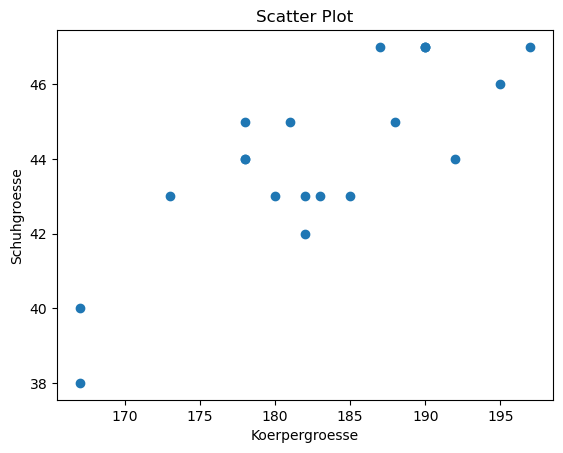

In [3]:

# Print data for verification
print("Body Heights (x):", x)
print("Shoe Sizes (y):", y)

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('Scatter Plot')
plt.show()


# Data cleaning

In [4]:
# remove data points containing nan
# Remove data points where either x or y is NaN
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]


# Training

In [5]:
from sklearn.linear_model import LinearRegression

# Train the linear regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))


LinearRegression()

In [6]:

# Train the linear regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y.reshape(-1, 1))


LinearRegression()

# Model evaluation

In [7]:

from sklearn.metrics import mean_squared_error, r2_score

# Get the learned parameters
theta_0 = model.intercept_[0]
theta_1 = model.coef_[0][0]
print(f"Intercept (θ₀): {theta_0:.2f}")
print(f"Slope (θ₁): {theta_1:.2f}")

# Predict shoe sizes for the training data
y_pred = model.predict(x.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Intercept (θ₀): 0.60
Slope (θ₁): 0.24
Mean Squared Error (MSE): 1.91
R² Score: 0.66


# Inference

Predicted shoe size for body height 181 cm: 43.64
Predicted shoe size for body height 192 cm: 46.25


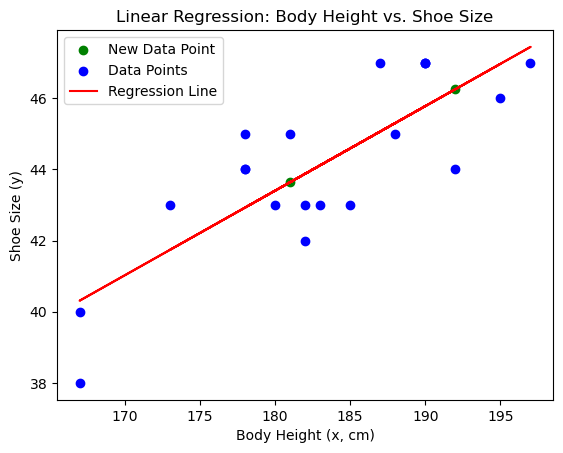

In [10]:
# Predict a new data point
new_x = np.array([[181], [192]])  # Example new body height
new_y_pred = model.predict(new_x)

# Print the prediction
for i in range(new_x.shape[0]):
    print(f"Predicted shoe size for body height {new_x[i][0]} cm: {new_y_pred[i][0]:.2f}")

# Plot the new data point
plt.scatter(new_x, new_y_pred, color='green', label='New Data Point')

# Plot the data and the regression line
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.xlabel("Body Height (x, cm)")
plt.ylabel("Shoe Size (y)")
plt.title("Linear Regression: Body Height vs. Shoe Size")
plt.legend()
plt.show()
